In [1]:
# very skewed data
# PCA 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("./data/bank-marketing/bank/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [21]:
np.unique(df['y'], return_counts=True)

(array(['no', 'yes'], dtype=object), array([39922,  5289]))

In [7]:
X = df.drop('y', axis=1)
X.shape

(45211, 16)

In [8]:
y = df['y']
y.shape

(45211,)

In [10]:
d1 = df.copy()

In [11]:
np.unique(d1.y, return_counts=True)

(array(['no', 'yes'], dtype=object), array([39922,  5289]))

In [12]:
while d1[d1.y=='no'].shape[0] > d1[d1.y=='yes'].shape[0]:
    d1 = pd.concat([d1, d1[d1.y=='yes']])

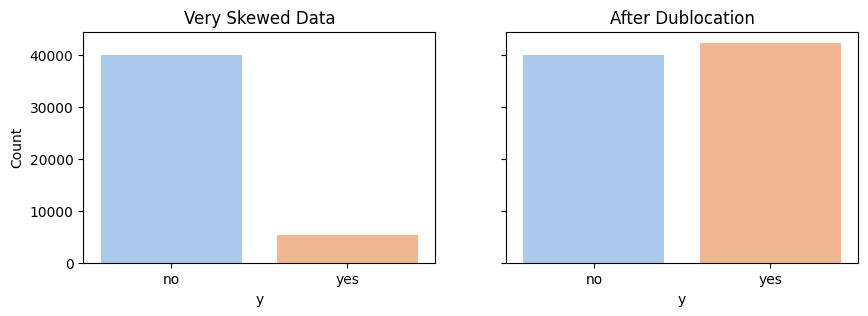

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 3))
ax1.set_xlabel('y')
ax1.set_ylabel('Count')

ax1.set_title('Very Skewed Data')
sns.countplot(x='y',data=df, hue='y', palette="pastel", ax=ax1)

ax2.set_xlabel('y')
ax2.set_title('After Dublocation')
sns.countplot(x='y',data=d1, hue='y', palette="pastel", ax=ax2)
fig.savefig('Skewed.png')
plt.show()
